In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [40]:
# Load ACLED Data 2025
acled_data = pd.read_csv('ACLED Data_2025-09-19.csv')

# Display basic information about the dataset
print("ACLED Data 2025 - Dataset Overview")
print("=" * 50)
print(f"Shape: {acled_data.shape}")
print(f"Columns: {list(acled_data.columns)}")
print(f"Date range: {acled_data['year'].min()} - {acled_data['year'].max()}")
print(f"Countries: {acled_data['country'].nunique()}")
print(f"Total events: {len(acled_data):,}")
print(f"Total fatalities: {acled_data['fatalities'].sum():,}")

print("\nFirst few rows:")
acled_data.head()


ACLED Data 2025 - Dataset Overview
Shape: (19739, 31)
Columns: ['event_id_cnty', 'event_date', 'year', 'time_precision', 'disorder_type', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2', 'interaction', 'civilian_targeting', 'iso', 'region', 'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude', 'geo_precision', 'source', 'source_scale', 'notes', 'fatalities', 'tags', 'timestamp']
Date range: 2010 - 2025
Countries: 9
Total events: 19,739
Total fatalities: 19,555

First few rows:


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,MMR1,2010-01-01,2010,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),DKBA (Buddhist): Democratic Karen Buddhist Arm...,State forces,...,Kyainseikgyi,16.0408,98.1232,2,Democratic Voice of Burma,National,"On 1 January 2010, the Democratic Karen Buddhi...",0,NaN,1552577624
1,MMR2,2010-01-02,2010,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),DKBA (Buddhist): Democratic Karen Buddhist Arm...,State forces,...,Kyainseikgyi,16.0408,98.1232,2,Democratic Voice of Burma,National,"On 2 January 2010, 40 Democratic Karen Buddhis...",0,NaN,1552577624
2,MMR4,2010-01-07,2010,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),NaN,State forces,...,Thanbyuzayat,15.9689,97.7274,2,Irrawaddy,National,"On 7 January 2010, in Thanbyuzayat township, M...",0,NaN,1561473737
3,KHM1883,2010-01-10,2010,1,Political violence,Violence against civilians,Attack,Police Forces of Cambodia (1993-),NaN,State forces,...,Ta Khmau,11.4464,104.9455,3,US State Department,Other,"On 10 January 2010, two commune officers beat ...",1,NaN,1618561247
4,THA7099,2010-01-10,2010,1,Political violence,Violence against civilians,Attack,Police Forces of Thailand (2008-2011) Border P...,NaN,State forces,...,Si Sa Ket,15.1148,104.3293,3,US State Department,Other,"On 10 January 2010, border rangers shot at a g...",2,NaN,1623191713


In [41]:
# Prepare data for time series analysis
# Convert date column to datetime
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])

# Filter for Myanmar and Kachin State
myanmar_data = acled_data[acled_data['country'] == 'Myanmar'].copy()
kachin_data = myanmar_data[myanmar_data['admin1'] == 'Kachin'].copy()

print(f"Kachin State events: {len(kachin_data)}")
print(f"Date range: {kachin_data['event_date'].min()} to {kachin_data['event_date'].max()}")

# Display basic Kachin data info
print(f"\nKachin State Overview:")
print(f"Total fatalities: {kachin_data['fatalities'].sum()}")
print(f"Districts: {sorted(kachin_data['admin2'].unique())}")
print(f"Event types: {kachin_data['event_type'].value_counts().head()}")

kachin_data.head()


Kachin State events: 829
Date range: 2010-05-23 00:00:00 to 2025-09-11 00:00:00

Kachin State Overview:
Total fatalities: 526
Districts: ['Bhamo', 'Mohnyin', 'Myitkyina', 'Puta-O']
Event types: Violence against civilians    419
Explosions/Remote violence    410
Name: event_type, dtype: int64


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
36,MMR59,2010-05-23,2010,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (1988-2011),NaN,State forces,...,Myitkyina,25.3832,97.3963,3,Kachin News Group,Subnational,"On 23 May 2010, the Myanmar military arrested ...",0,NaN,1702344110
121,MMR275,2011-06-09,2011,1,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (2011-2016),NaN,State forces,...,Momauk,24.2508,97.3481,2,Kachin News Group,Subnational,"On 9 June 2011, in Sang Gang village, Momauk t...",1,NaN,1702344110
122,MMR8328,2011-06-13,2011,1,Political violence,Violence against civilians,Sexual violence,Military Forces of Myanmar (2011-2016),NaN,State forces,...,Myitkyina,25.3832,97.3963,3,Women's League of Burma,Other,"On 13 June 2011, in Ahlaw Bum area (coded for ...",0,NaN,1563887830
124,MMR8329,2011-06-14,2011,1,Political violence,Violence against civilians,Sexual violence,Military Forces of Myanmar (2011-2016),NaN,State forces,...,Momauk,24.2508,97.3481,1,Kachin Women's Association Thailand,Other,"On 14 June 2011, in Momauk Township, in Bhamo ...",0,NaN,1708472559
125,MMR6875,2011-06-15,2011,3,Political violence,Violence against civilians,Attack,Military Forces of Myanmar (2011-2016),NaN,State forces,...,Puta-O,27.3526,97.4004,1,UN (unspecified),Other,"In June 2011, in Puta-O Township, Kachin State...",1,NaN,1567539407


In [42]:
# Create quarterly time series data for Kachin State
print("Creating Quarterly Time Series Data for Kachin State")
print("=" * 60)

# Create quarterly periods
kachin_data['quarter'] = kachin_data['event_date'].dt.to_period('Q')

# Aggregate events by quarter
quarterly_events = kachin_data.groupby('quarter').agg({
    'event_id_cnty': 'count',  # Count of events
    'fatalities': ['sum', 'mean'],  # Total and average fatalities
    'event_date': ['min', 'max']  # Date range for each quarter
}).round(2)

# Flatten column names
quarterly_events.columns = ['events_count', 'total_fatalities', 'avg_fatalities', 'quarter_start', 'quarter_end']
quarterly_events = quarterly_events.reset_index()

# Create a clean two-column dataset: Time and Events
kachin_time_series = quarterly_events[['quarter', 'events_count']].copy()
kachin_time_series.columns = ['Time', 'Events']

# Convert quarter to string for better readability
kachin_time_series['Time'] = kachin_time_series['Time'].astype(str)

print("Quarterly Time Series Data for Kachin State:")
print("-" * 50)
print(kachin_time_series)

print(f"\nDataset Shape: {kachin_time_series.shape}")
print(f"Time Period: {kachin_time_series['Time'].min()} to {kachin_time_series['Time'].max()}")
print(f"Total Events: {kachin_time_series['Events'].sum()}")
print(f"Average Events per Quarter: {kachin_time_series['Events'].mean():.2f}")

# Save to CSV for external use
kachin_time_series.to_csv('kachin_quarterly_events.csv', index=False)
print(f"\nDataset saved as 'kachin_quarterly_events.csv'")


Creating Quarterly Time Series Data for Kachin State
Quarterly Time Series Data for Kachin State:
--------------------------------------------------
      Time  Events
0   2010Q2       1
1   2011Q2      16
2   2011Q3       6
3   2011Q4      34
4   2012Q1       5
5   2012Q2      11
6   2012Q3       5
7   2012Q4      10
8   2013Q1       7
9   2013Q3       5
10  2013Q4       9
11  2014Q1       4
12  2014Q2       2
13  2014Q3       1
14  2014Q4       2
15  2015Q1       2
16  2015Q2       8
17  2015Q3       2
18  2015Q4       9
19  2016Q2       8
20  2016Q3       9
21  2016Q4      27
22  2017Q1      11
23  2017Q2       3
24  2017Q3       9
25  2017Q4       8
26  2018Q1      12
27  2018Q2      15
28  2018Q3      10
29  2018Q4       3
30  2019Q1       2
31  2019Q2       2
32  2020Q3       1
33  2021Q1       7
34  2021Q2      65
35  2021Q3      20
36  2021Q4      13
37  2022Q1      15
38  2022Q2       9
39  2022Q3      23
40  2022Q4      27
41  2023Q1      32
42  2023Q2      32
43  2023Q3     

In [43]:
# Additional analysis: Monthly data aggregated to quarters with more details
print("Detailed Quarterly Analysis with Additional Metrics")
print("=" * 60)

# Create more detailed quarterly aggregation
detailed_quarterly = kachin_data.groupby('quarter').agg({
    'event_id_cnty': 'count',  # Event count
    'fatalities': ['sum', 'mean', 'max'],  # Fatalities metrics
    'event_type': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown',  # Most common event type
    'admin2': lambda x: x.nunique(),  # Number of districts affected
    'actor1': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'  # Most common actor
}).round(2)

# Flatten column names
detailed_quarterly.columns = ['events_count', 'total_fatalities', 'avg_fatalities', 'max_fatalities', 
                             'most_common_event_type', 'districts_affected', 'most_common_actor']
detailed_quarterly = detailed_quarterly.reset_index()

print("Detailed Quarterly Data:")
print(detailed_quarterly)

# Create extended time series with multiple metrics
extended_time_series = detailed_quarterly[['quarter', 'events_count', 'total_fatalities', 'avg_fatalities']].copy()
extended_time_series.columns = ['Time', 'Events', 'Fatalities', 'Avg_Fatalities_Per_Event']
extended_time_series['Time'] = extended_time_series['Time'].astype(str)

print(f"\nExtended Time Series Data (4 columns):")
print(extended_time_series)

# Save extended dataset
extended_time_series.to_csv('kachin_quarterly_extended.csv', index=False)
print(f"\nExtended dataset saved as 'kachin_quarterly_extended.csv'")

# Summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"Quarters with data: {len(detailed_quarterly)}")
print(f"Total events: {detailed_quarterly['events_count'].sum()}")
print(f"Total fatalities: {detailed_quarterly['total_fatalities'].sum()}")
print(f"Average events per quarter: {detailed_quarterly['events_count'].mean():.2f}")
print(f"Average fatalities per quarter: {detailed_quarterly['total_fatalities'].mean():.2f}")
print(f"Most violent quarter: {detailed_quarterly.loc[detailed_quarterly['total_fatalities'].idxmax(), 'quarter']} ({detailed_quarterly['total_fatalities'].max()} fatalities)")
print(f"Most active quarter: {detailed_quarterly.loc[detailed_quarterly['events_count'].idxmax(), 'quarter']} ({detailed_quarterly['events_count'].max()} events)")


Detailed Quarterly Analysis with Additional Metrics
Detailed Quarterly Data:
   quarter  events_count  total_fatalities  avg_fatalities  max_fatalities  \
0   2010Q2             1                 0            0.00               0   
1   2011Q2            16                23            1.44               7   
2   2011Q3             6                 5            0.83               2   
3   2011Q4            34                10            0.29               1   
4   2012Q1             5                 6            1.20               3   
5   2012Q2            11                 4            0.36               2   
6   2012Q3             5                 2            0.40               1   
7   2012Q4            10                 0            0.00               0   
8   2013Q1             7                 5            0.71               4   
9   2013Q3             5                 2            0.40               2   
10  2013Q4             9                 2            0.22       

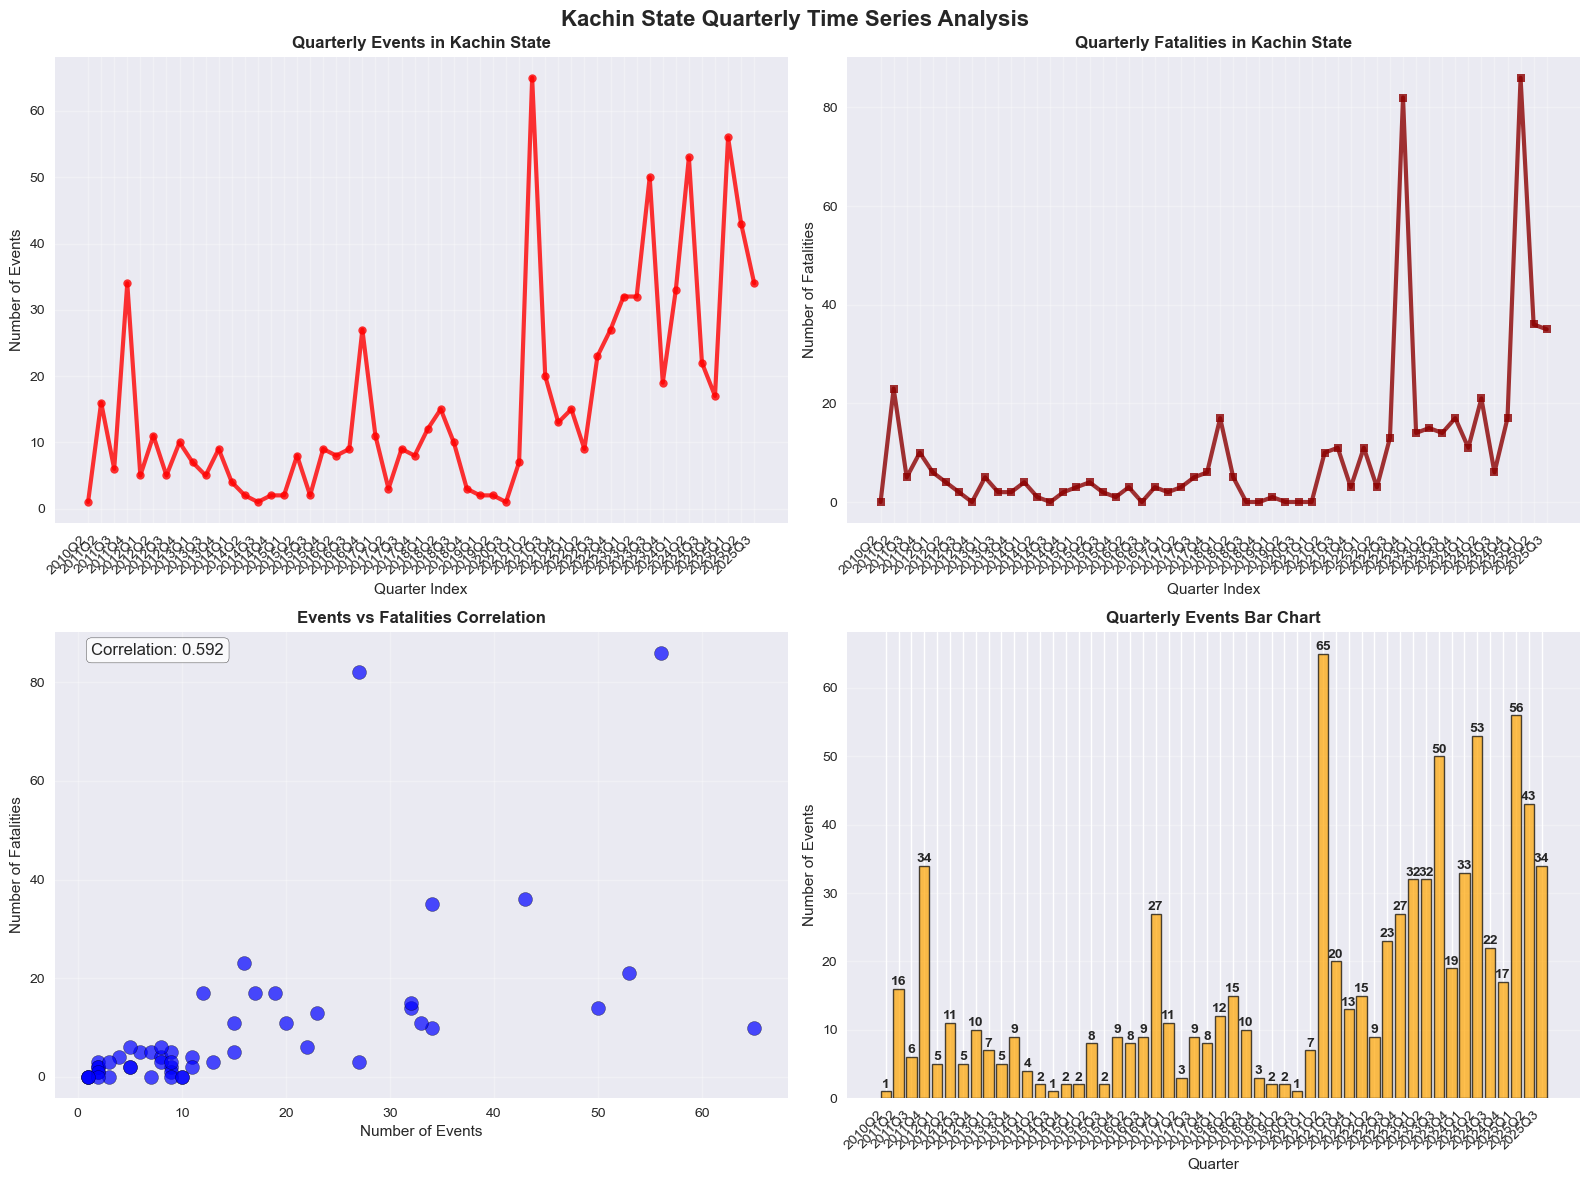


FINAL TIME SERIES DATASET FOR ANALYSIS:
Two-column dataset (Time, Events):
      Time  Events
0   2010Q2       1
1   2011Q2      16
2   2011Q3       6
3   2011Q4      34
4   2012Q1       5
5   2012Q2      11
6   2012Q3       5
7   2012Q4      10
8   2013Q1       7
9   2013Q3       5
10  2013Q4       9
11  2014Q1       4
12  2014Q2       2
13  2014Q3       1
14  2014Q4       2
15  2015Q1       2
16  2015Q2       8
17  2015Q3       2
18  2015Q4       9
19  2016Q2       8
20  2016Q3       9
21  2016Q4      27
22  2017Q1      11
23  2017Q2       3
24  2017Q3       9
25  2017Q4       8
26  2018Q1      12
27  2018Q2      15
28  2018Q3      10
29  2018Q4       3
30  2019Q1       2
31  2019Q2       2
32  2020Q3       1
33  2021Q1       7
34  2021Q2      65
35  2021Q3      20
36  2021Q4      13
37  2022Q1      15
38  2022Q2       9
39  2022Q3      23
40  2022Q4      27
41  2023Q1      32
42  2023Q2      32
43  2023Q3      50
44  2023Q4      19
45  2024Q1      33
46  2024Q2      53
47  2024Q3  

In [44]:
# Visualize the quarterly time series data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Kachin State Quarterly Time Series Analysis', fontsize=16, fontweight='bold')

# 1. Basic quarterly events line chart
axes[0, 0].plot(range(len(kachin_time_series)), kachin_time_series['Events'], 
                linewidth=3, marker='o', markersize=6, color='red', alpha=0.8)
axes[0, 0].set_title('Quarterly Events in Kachin State', fontweight='bold')
axes[0, 0].set_xlabel('Quarter Index')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add quarter labels
axes[0, 0].set_xticks(range(len(kachin_time_series)))
axes[0, 0].set_xticklabels(kachin_time_series['Time'], rotation=45, ha='right')

# 2. Quarterly fatalities
axes[0, 1].plot(range(len(extended_time_series)), extended_time_series['Fatalities'], 
                linewidth=3, marker='s', markersize=6, color='darkred', alpha=0.8)
axes[0, 1].set_title('Quarterly Fatalities in Kachin State', fontweight='bold')
axes[0, 1].set_xlabel('Quarter Index')
axes[0, 1].set_ylabel('Number of Fatalities')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(len(extended_time_series)))
axes[0, 1].set_xticklabels(extended_time_series['Time'], rotation=45, ha='right')

# 3. Events vs Fatalities scatter plot
axes[1, 0].scatter(extended_time_series['Events'], extended_time_series['Fatalities'], 
                   s=100, color='blue', alpha=0.7, edgecolors='black')
axes[1, 0].set_title('Events vs Fatalities Correlation', fontweight='bold')
axes[1, 0].set_xlabel('Number of Events')
axes[1, 0].set_ylabel('Number of Fatalities')
axes[1, 0].grid(True, alpha=0.3)

# Add correlation coefficient
correlation = extended_time_series['Events'].corr(extended_time_series['Fatalities'])
axes[1, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=axes[1, 0].transAxes, fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Bar chart of quarterly events
bars = axes[1, 1].bar(range(len(kachin_time_series)), kachin_time_series['Events'], 
                      color='orange', alpha=0.7, edgecolor='black', linewidth=1)
axes[1, 1].set_title('Quarterly Events Bar Chart', fontweight='bold')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Number of Events')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticks(range(len(kachin_time_series)))
axes[1, 1].set_xticklabels(kachin_time_series['Time'], rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Display the final clean dataset
print("\nFINAL TIME SERIES DATASET FOR ANALYSIS:")
print("=" * 50)
print("Two-column dataset (Time, Events):")
print(kachin_time_series)
print(f"\nDataset ready for time series analysis!")
print(f"Use 'kachin_time_series' variable or load from 'kachin_quarterly_events.csv'")


In [45]:
# Data quality check and basic statistics
print("Data Quality Check")
print("=" * 30)
print(f"Missing values per column:")
missing_data = acled_data.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"  {col}: {missing:,} ({missing/len(acled_data)*100:.1f}%)")

print(f"\nData types:")
print(acled_data.dtypes)

print(f"\nBasic statistics for numeric columns:")
acled_data.describe()


Data Quality Check
Missing values per column:
  assoc_actor_1: 16,938 (85.8%)
  actor2: 3,098 (15.7%)
  assoc_actor_2: 11,269 (57.1%)
  inter2: 3,098 (15.7%)
  civilian_targeting: 5,744 (29.1%)
  admin2: 4 (0.0%)
  admin3: 217 (1.1%)
  tags: 19,431 (98.4%)

Data types:
event_id_cnty                 object
event_date            datetime64[ns]
year                           int64
time_precision                 int64
disorder_type                 object
event_type                    object
sub_event_type                object
actor1                        object
assoc_actor_1                 object
inter1                        object
actor2                        object
assoc_actor_2                 object
inter2                        object
interaction                   object
civilian_targeting            object
iso                            int64
region                        object
country                       object
admin1                        object
admin2                     

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,1.973900e+04
mean,2021.663002,1.089468,229.395613,18.103681,102.809433,1.315872,0.990678,1.742098e+09
std,3.200041,0.315442,214.182038,6.059362,12.218299,0.485452,3.388604,2.976182e+07
min,2010.000000,1.000000,104.000000,-10.732300,92.183700,1.000000,0.000000,1.552577e+09
25%,2020.000000,1.000000,104.000000,14.829300,95.290650,1.000000,0.000000,1.744085e+09
50%,2023.000000,1.000000,104.000000,20.223600,96.481300,1.000000,0.000000,1.753971e+09
75%,2024.000000,1.000000,360.000000,22.210400,106.630000,2.000000,1.000000,1.754411e+09
max,2025.000000,3.000000,764.000000,27.505300,140.850400,3.000000,243.000000,1.758048e+09


In [46]:
# Convert date column to datetime for better analysis
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])

# Extract additional date components
acled_data['month'] = acled_data['event_date'].dt.month
acled_data['day_of_year'] = acled_data['event_date'].dt.dayofyear

# Display data info after date conversion
print("After date conversion:")
print(f"Date range: {acled_data['event_date'].min()} to {acled_data['event_date'].max()}")
print(f"Unique years: {sorted(acled_data['year'].unique())}")


After date conversion:
Date range: 2010-01-01 00:00:00 to 2025-09-12 00:00:00
Unique years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [47]:
# Filter for Myanmar data specifically (since this is about Kachin conflict)
myanmar_data = acled_data[acled_data['country'] == 'Myanmar'].copy()

print("Myanmar-specific ACLED Data")
print("=" * 40)
print(f"Myanmar events: {len(myanmar_data):,}")
print(f"Date range: {myanmar_data['event_date'].min()} to {myanmar_data['event_date'].max()}")
print(f"Total fatalities in Myanmar: {myanmar_data['fatalities'].sum():,}")
print(f"States/Regions: {myanmar_data['admin1'].nunique()}")
print(f"Unique states: {sorted(myanmar_data['admin1'].unique())}")

print(f"\nEvent types in Myanmar:")
print(myanmar_data['event_type'].value_counts())


Myanmar-specific ACLED Data
Myanmar events: 14,460
Date range: 2010-01-01 00:00:00 to 2025-09-12 00:00:00
Total fatalities in Myanmar: 13,378
States/Regions: 18
Unique states: ['Ayeyarwady', 'Bago-East', 'Bago-West', 'Chin', 'Kachin', 'Kayah', 'Kayin', 'Magway', 'Mandalay', 'Mon', 'Nay Pyi Taw', 'Rakhine', 'Sagaing', 'Shan-East', 'Shan-North', 'Shan-South', 'Tanintharyi', 'Yangon']

Event types in Myanmar:
Explosions/Remote violence    7487
Violence against civilians    6973
Name: event_type, dtype: int64


In [48]:
# Focus on Kachin State specifically
kachin_data = myanmar_data[myanmar_data['admin1'] == 'Kachin'].copy()



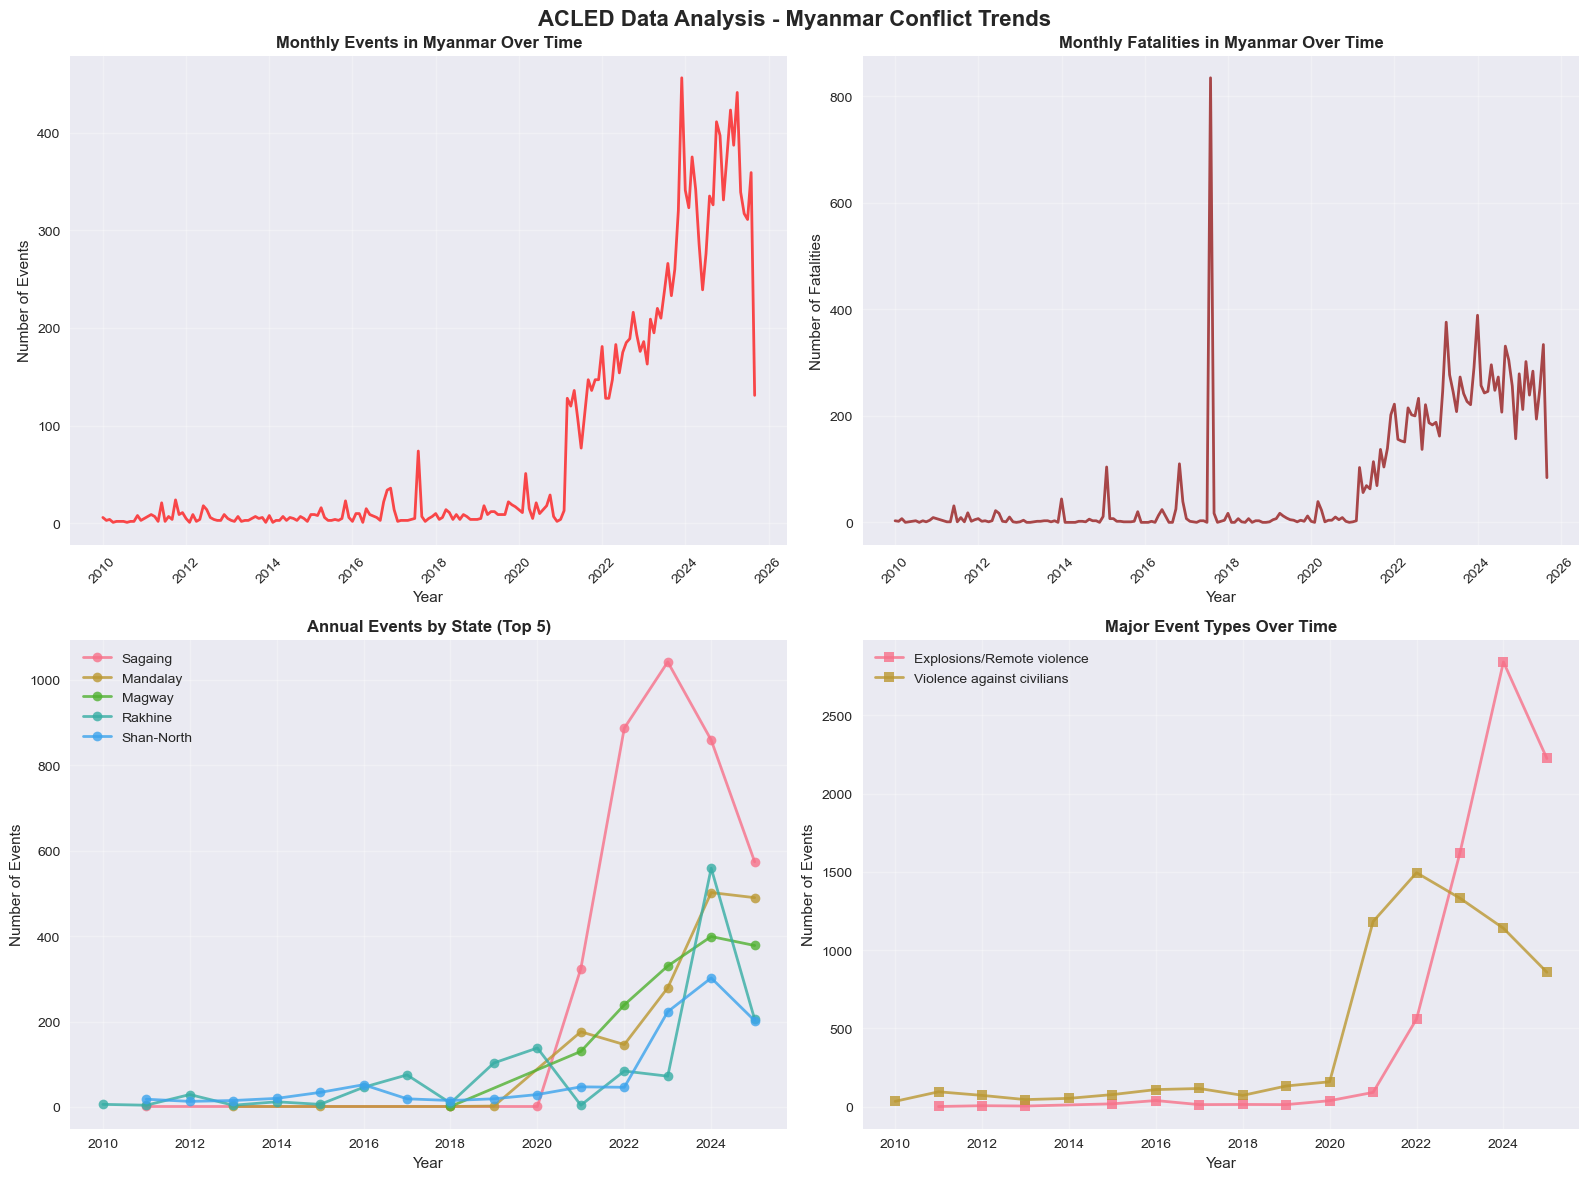

In [49]:
# Create line graphs for temporal analysis

# 1. Events over time for Myanmar
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ACLED Data Analysis - Myanmar Conflict Trends', fontsize=16, fontweight='bold')

# Monthly events in Myanmar over time
monthly_events = myanmar_data.groupby(['year', 'month']).size().reset_index(name='event_count')
monthly_events['date'] = pd.to_datetime(monthly_events[['year', 'month']].assign(day=1))

axes[0, 0].plot(monthly_events['date'], monthly_events['event_count'], linewidth=2, color='red', alpha=0.7)
axes[0, 0].set_title('Monthly Events in Myanmar Over Time', fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly fatalities in Myanmar
monthly_fatalities = myanmar_data.groupby(['year', 'month'])['fatalities'].sum().reset_index()
monthly_fatalities['date'] = pd.to_datetime(monthly_fatalities[['year', 'month']].assign(day=1))

axes[0, 1].plot(monthly_fatalities['date'], monthly_fatalities['fatalities'], linewidth=2, color='darkred', alpha=0.7)
axes[0, 1].set_title('Monthly Fatalities in Myanmar Over Time', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Fatalities')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Annual events by state (top 5 states)
top_states = myanmar_data['admin1'].value_counts().head(5).index
annual_by_state = myanmar_data[myanmar_data['admin1'].isin(top_states)].groupby(['year', 'admin1']).size().reset_index(name='event_count')

for state in top_states:
    state_data = annual_by_state[annual_by_state['admin1'] == state]
    axes[1, 0].plot(state_data['year'], state_data['event_count'], marker='o', linewidth=2, label=state, alpha=0.8)

axes[1, 0].set_title('Annual Events by State (Top 5)', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Event types over time
event_types_over_time = myanmar_data.groupby(['year', 'event_type']).size().reset_index(name='event_count')
major_event_types = myanmar_data['event_type'].value_counts().head(4).index

for event_type in major_event_types:
    type_data = event_types_over_time[event_types_over_time['event_type'] == event_type]
    axes[1, 1].plot(type_data['year'], type_data['event_count'], marker='s', linewidth=2, label=event_type, alpha=0.8)

axes[1, 1].set_title('Major Event Types Over Time', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Events')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


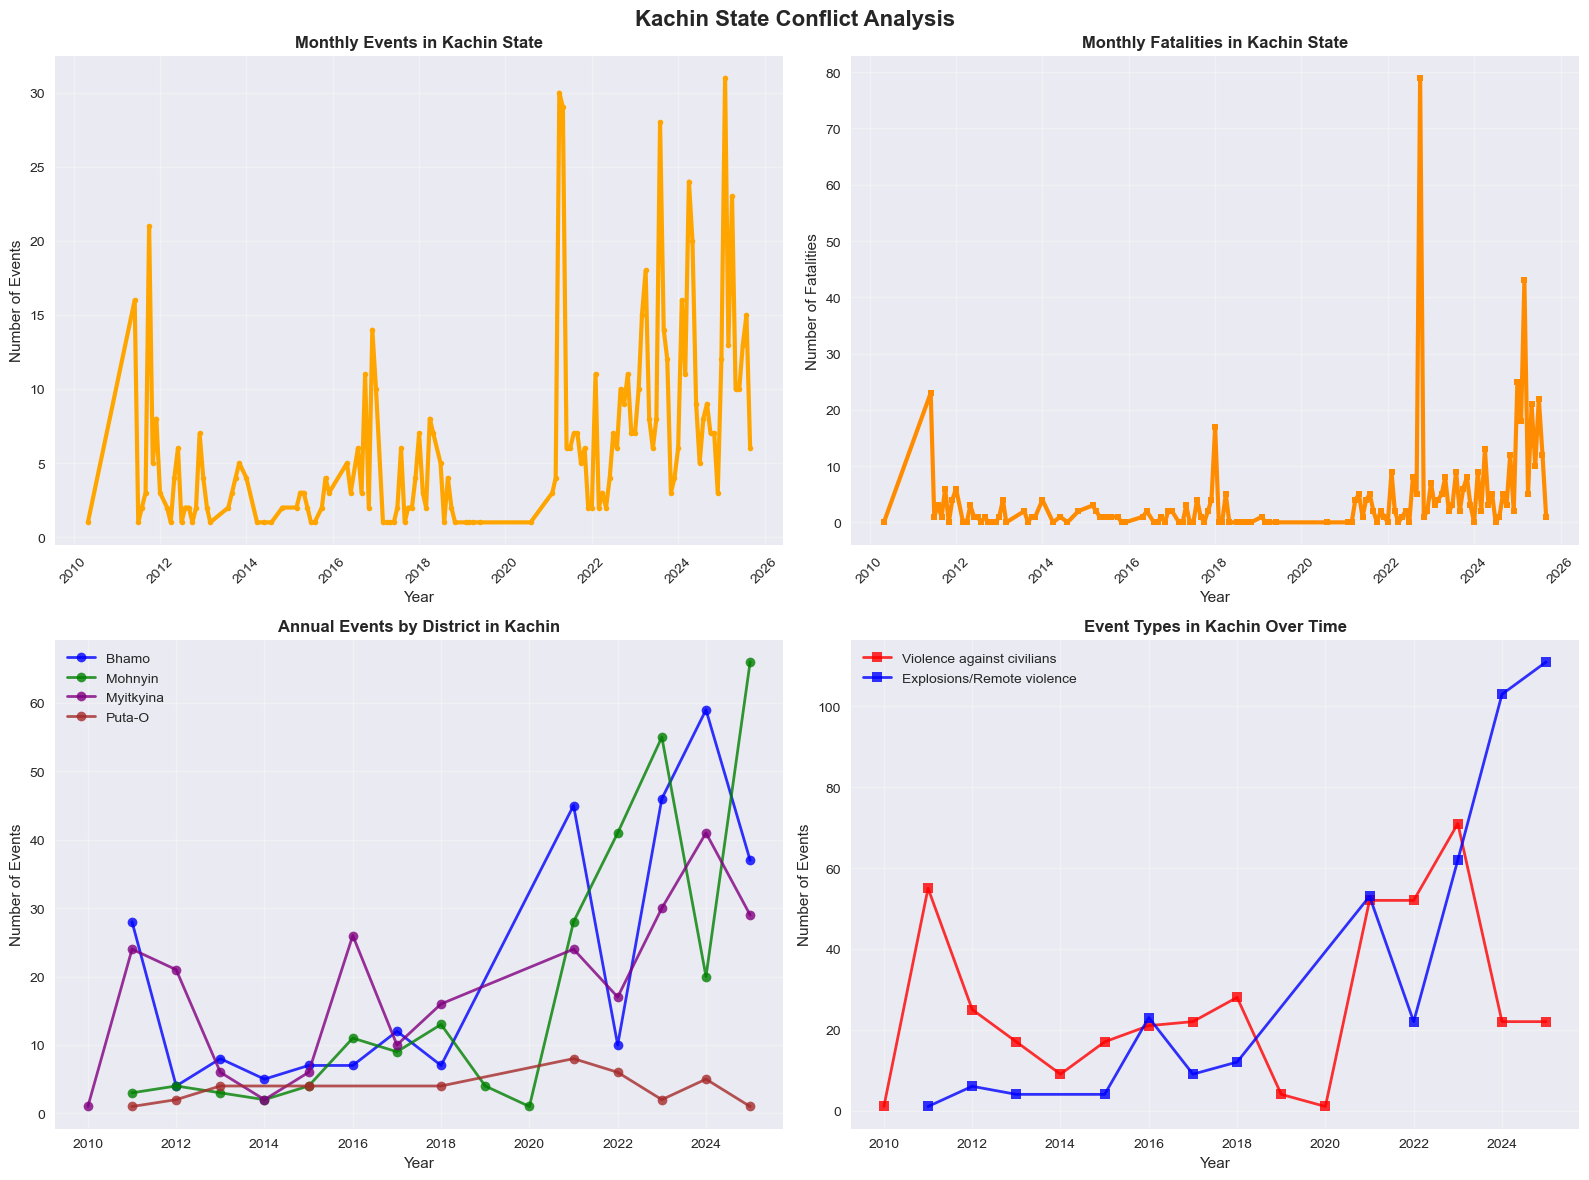

In [50]:
# Kachin-specific analysis with line graphs
if len(kachin_data) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Kachin State Conflict Analysis', fontsize=16, fontweight='bold')
    
    # Monthly events in Kachin
    kachin_monthly = kachin_data.groupby(['year', 'month']).size().reset_index(name='event_count')
    kachin_monthly['date'] = pd.to_datetime(kachin_monthly[['year', 'month']].assign(day=1))
    
    axes[0, 0].plot(kachin_monthly['date'], kachin_monthly['event_count'], 
                    linewidth=3, color='orange', marker='o', markersize=4)
    axes[0, 0].set_title('Monthly Events in Kachin State', fontweight='bold')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Number of Events')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Monthly fatalities in Kachin
    kachin_fatalities = kachin_data.groupby(['year', 'month'])['fatalities'].sum().reset_index()
    kachin_fatalities['date'] = pd.to_datetime(kachin_fatalities[['year', 'month']].assign(day=1))
    
    axes[0, 1].plot(kachin_fatalities['date'], kachin_fatalities['fatalities'], 
                    linewidth=3, color='darkorange', marker='s', markersize=4)
    axes[0, 1].set_title('Monthly Fatalities in Kachin State', fontweight='bold')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Number of Fatalities')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Annual events by district in Kachin
    kachin_districts = kachin_data['admin2'].value_counts().head(4).index
    annual_by_district = kachin_data[kachin_data['admin2'].isin(kachin_districts)].groupby(['year', 'admin2']).size().reset_index(name='event_count')
    
    colors = ['blue', 'green', 'purple', 'brown']
    for i, district in enumerate(kachin_districts):
        district_data = annual_by_district[annual_by_district['admin2'] == district]
        axes[1, 0].plot(district_data['year'], district_data['event_count'], 
                        marker='o', linewidth=2, label=district, color=colors[i], alpha=0.8)
    
    axes[1, 0].set_title('Annual Events by District in Kachin', fontweight='bold')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Number of Events')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Event types in Kachin over time
    kachin_event_types = kachin_data.groupby(['year', 'event_type']).size().reset_index(name='event_count')
    kachin_major_types = kachin_data['event_type'].value_counts().head(4).index
    
    colors = ['red', 'blue', 'green', 'purple']
    for i, event_type in enumerate(kachin_major_types):
        type_data = kachin_event_types[kachin_event_types['event_type'] == event_type]
        axes[1, 1].plot(type_data['year'], type_data['event_count'], 
                        marker='s', linewidth=2, label=event_type, color=colors[i], alpha=0.8)
    
    axes[1, 1].set_title('Event Types in Kachin Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Events')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No Kachin data available for visualization")


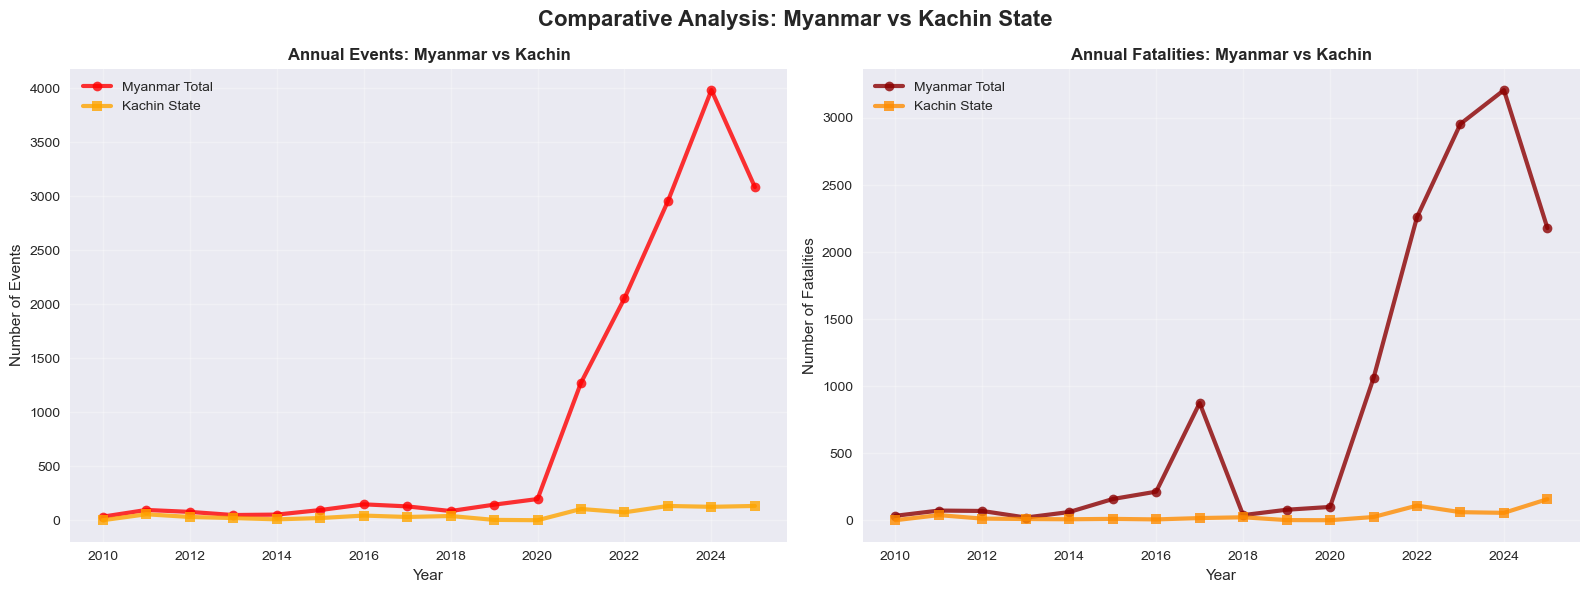

In [51]:
# Comparative line graph: Myanmar vs Kachin
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparative Analysis: Myanmar vs Kachin State', fontsize=16, fontweight='bold')

# Annual events comparison
myanmar_annual = myanmar_data.groupby('year').size().reset_index(name='myanmar_events')
kachin_annual = kachin_data.groupby('year').size().reset_index(name='kachin_events')

axes[0].plot(myanmar_annual['year'], myanmar_annual['myanmar_events'], 
             linewidth=3, color='red', marker='o', label='Myanmar Total', alpha=0.8)
if len(kachin_data) > 0:
    axes[0].plot(kachin_annual['year'], kachin_annual['kachin_events'], 
                 linewidth=3, color='orange', marker='s', label='Kachin State', alpha=0.8)

axes[0].set_title('Annual Events: Myanmar vs Kachin', fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Events')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Annual fatalities comparison
myanmar_fatalities_annual = myanmar_data.groupby('year')['fatalities'].sum().reset_index(name='myanmar_fatalities')
kachin_fatalities_annual = kachin_data.groupby('year')['fatalities'].sum().reset_index(name='kachin_fatalities')

axes[1].plot(myanmar_fatalities_annual['year'], myanmar_fatalities_annual['myanmar_fatalities'], 
             linewidth=3, color='darkred', marker='o', label='Myanmar Total', alpha=0.8)
if len(kachin_data) > 0:
    axes[1].plot(kachin_fatalities_annual['year'], kachin_fatalities_annual['kachin_fatalities'], 
                 linewidth=3, color='darkorange', marker='s', label='Kachin State', alpha=0.8)

axes[1].set_title('Annual Fatalities: Myanmar vs Kachin', fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Fatalities')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [52]:
# Create quarterly time series data for Kachin State
print("Creating Quarterly Time Series Data for Kachin State")
print("=" * 60)

# Create quarterly periods
kachin_data['quarter'] = kachin_data['event_date'].dt.to_period('Q')

# Aggregate events by quarter
quarterly_events = kachin_data.groupby('quarter').agg({
    'event_id_cnty': 'count',  # Count of events
    'fatalities': ['sum', 'mean'],  # Total and average fatalities
    'event_date': ['min', 'max']  # Date range for each quarter
}).round(2)

# Flatten column names
quarterly_events.columns = ['events_count', 'total_fatalities', 'avg_fatalities', 'quarter_start', 'quarter_end']
quarterly_events = quarterly_events.reset_index()

# Create a clean two-column dataset: Time and Events
kachin_time_series = quarterly_events[['quarter', 'events_count']].copy()
kachin_time_series.columns = ['Time', 'Events']



print("Quarterly Time Series Data for Kachin State:")
print("-" * 50)
print(kachin_time_series)

print(f"\nDataset Shape: {kachin_time_series.shape}")
print(f"Time Period: {kachin_time_series['Time'].min()} to {kachin_time_series['Time'].max()}")
print(f"Total Events: {kachin_time_series['Events'].sum()}")
print(f"Average Events per Quarter: {kachin_time_series['Events'].mean():.2f}")

# Save to CSV for external use
kachin_time_series.to_csv('kachin_quarterly_events.csv', index=False)
print(f"\nDataset saved as 'kachin_quarterly_events.csv'")

Creating Quarterly Time Series Data for Kachin State
Quarterly Time Series Data for Kachin State:
--------------------------------------------------
      Time  Events
0   2010Q2       1
1   2011Q2      16
2   2011Q3       6
3   2011Q4      34
4   2012Q1       5
5   2012Q2      11
6   2012Q3       5
7   2012Q4      10
8   2013Q1       7
9   2013Q3       5
10  2013Q4       9
11  2014Q1       4
12  2014Q2       2
13  2014Q3       1
14  2014Q4       2
15  2015Q1       2
16  2015Q2       8
17  2015Q3       2
18  2015Q4       9
19  2016Q2       8
20  2016Q3       9
21  2016Q4      27
22  2017Q1      11
23  2017Q2       3
24  2017Q3       9
25  2017Q4       8
26  2018Q1      12
27  2018Q2      15
28  2018Q3      10
29  2018Q4       3
30  2019Q1       2
31  2019Q2       2
32  2020Q3       1
33  2021Q1       7
34  2021Q2      65
35  2021Q3      20
36  2021Q4      13
37  2022Q1      15
38  2022Q2       9
39  2022Q3      23
40  2022Q4      27
41  2023Q1      32
42  2023Q2      32
43  2023Q3     

In [53]:
# Libraries to do data manipulation
import numpy as np

import pandas as pd

# Library to do data visualization
import matplotlib.pyplot as plt

# Library to do time series decomposition
import statsmodels.api as sm

# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

# Module to build AR, MA, ARMA, and ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# Module to implement MSE and RSME during model evaluation
from sklearn.metrics import mean_squared_error

# Code for ignoring unnecessary warnings while executing some code
import warnings
warnings.filterwarnings("ignore")

In [54]:


# To perform seasonal decomposition, we need a numeric time series with a proper datetime index.
# Set the 'Time' column as the index and ensure it is a datetime or period index.
kachin_time_series_indexed = kachin_time_series.copy()
kachin_time_series_indexed['Time'] = pd.PeriodIndex(kachin_time_series_indexed['Time'], freq='Q')
kachin_time_series_indexed.set_index('Time', inplace=True)

# Use only the numeric 'Events' column for decomposition
events_series = kachin_time_series_indexed['Events']

# Perform seasonal decomposition on the numeric series
decomposition = sm.tsa.seasonal_decompose(events_series, model='additive', period=4)

# Creating a dataframe to store the individual components
decomposed_data = pd.DataFrame({
    'trend': decomposition.trend,
    'seasonal': decomposition.seasonal,
    'random_noise': decomposition.resid
})

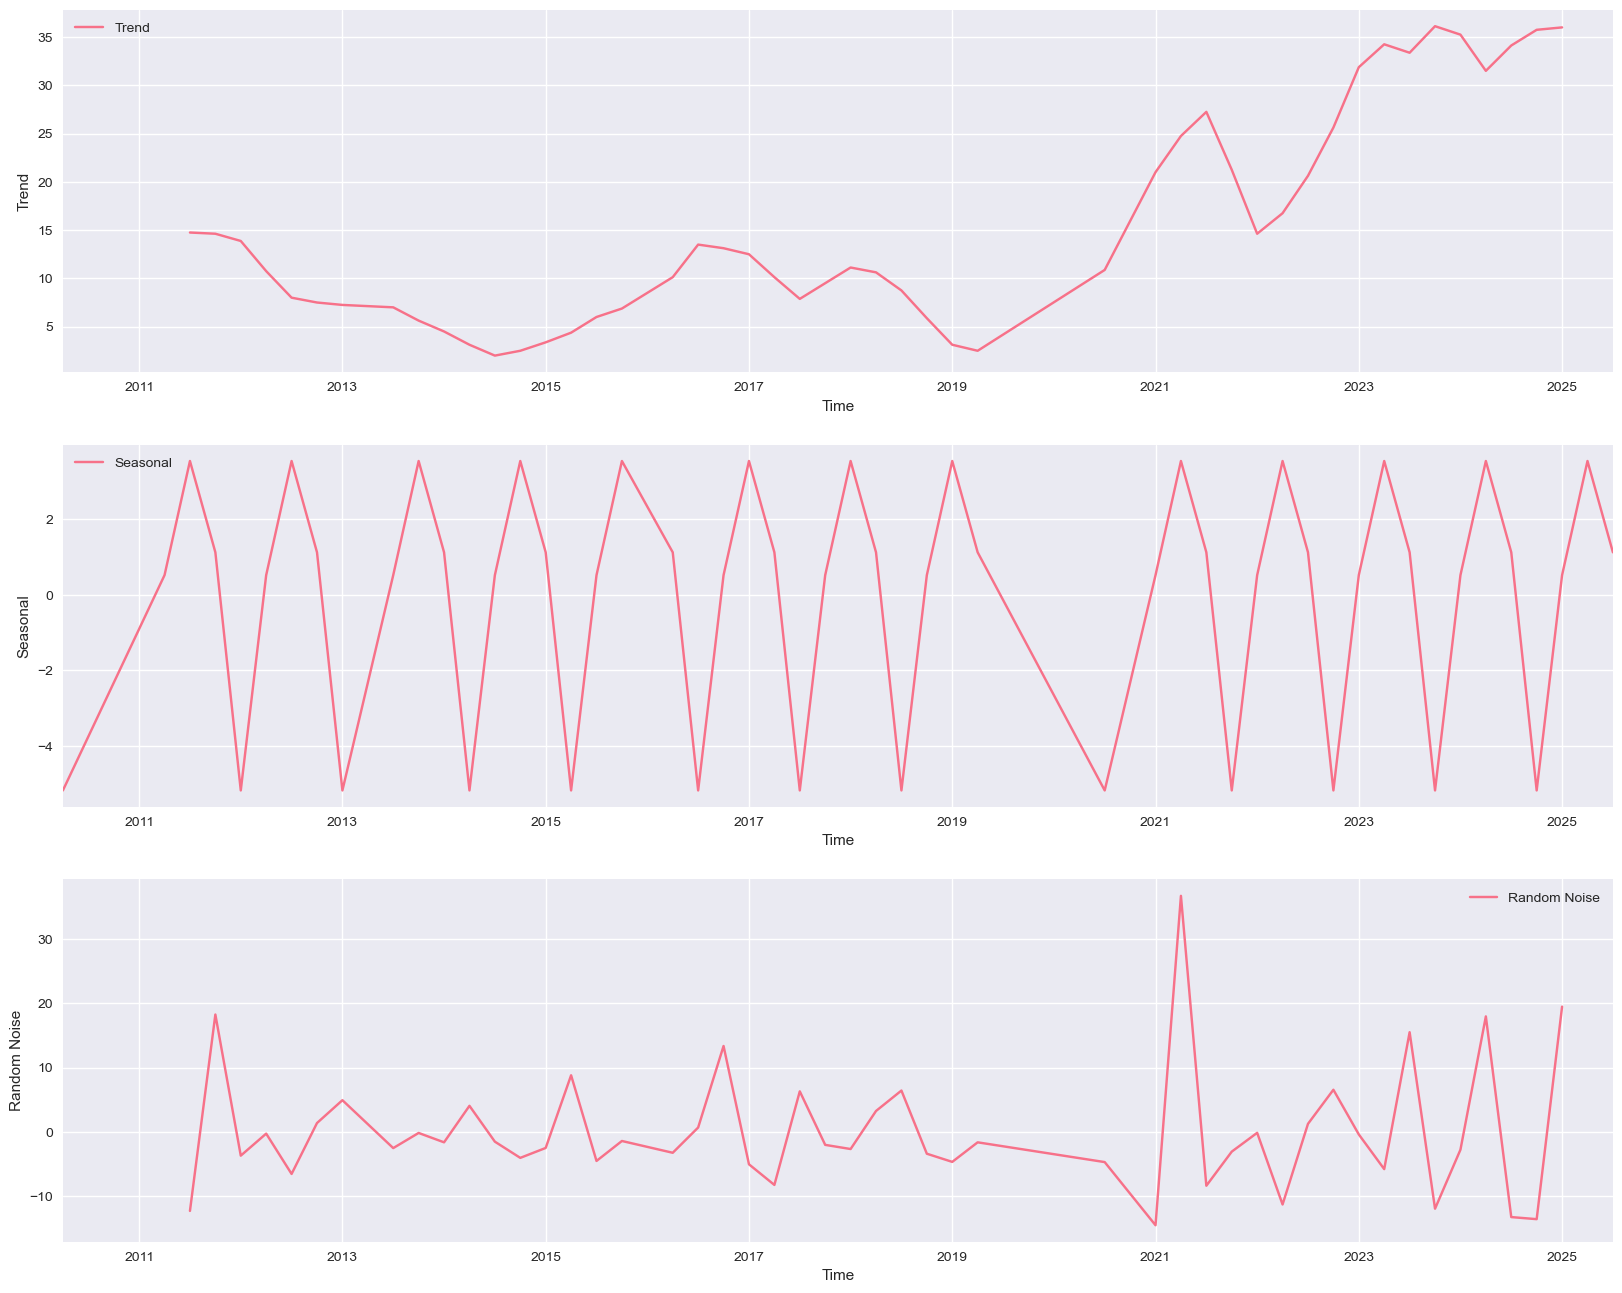

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 16))

decomposed_data['trend'].plot(ax = ax1, label='Trend')
ax1.set_ylabel('Trend')
ax1.legend()

decomposed_data['seasonal'].plot(ax = ax2, label='Seasonal')
ax2.set_ylabel('Seasonal')
ax2.legend()

decomposed_data['random_noise'].plot(ax = ax3, label='Random Noise')
ax3.set_ylabel('Random Noise')
ax3.legend()

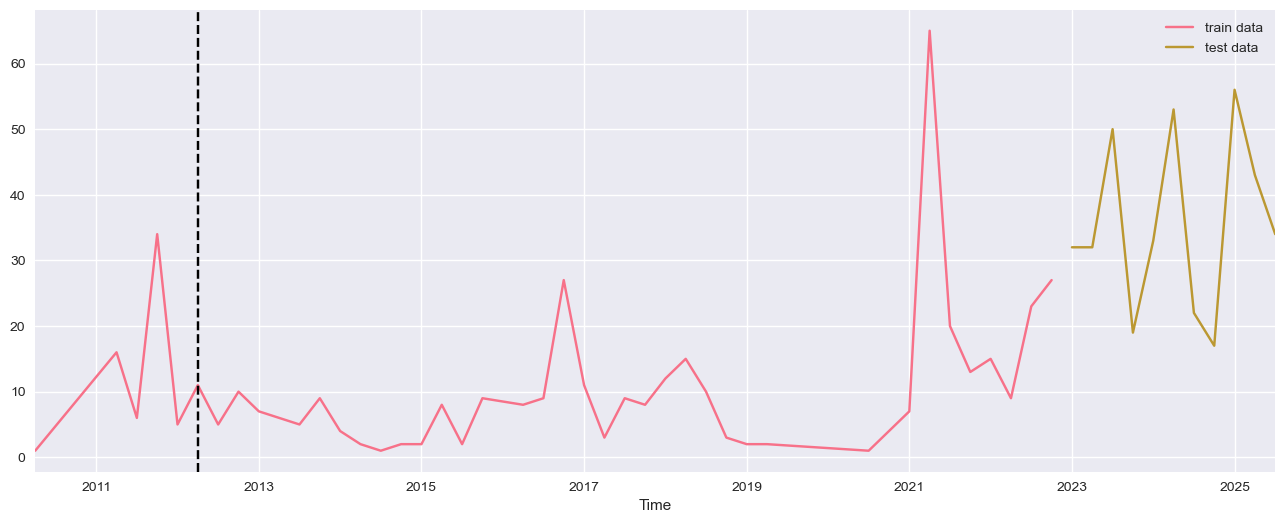

In [56]:
# Split the data into approximately 80% train and 20% test based on time order
split_idx = int(len(kachin_time_series_indexed) * 0.8)
train_data = kachin_time_series_indexed.iloc[:split_idx]
test_data = kachin_time_series_indexed.iloc[split_idx:]

# Visualize the train and test data in the same plot
fig, ax = plt.subplots(figsize = (16, 6))

# Plotting train data
train_data['Events'].plot(ax = ax)

# Plotting test data
test_data['Events'].plot(ax = ax)

# Adding the legends in sequential order
plt.legend(['train data', 'test data'])

# Showing the time which divides the original data into train and test
plt.axvline(x = pd.Period('2012Q2', freq='Q'), color = 'black', linestyle = '--')

# Showing the plot
plt.show()

In [57]:
# Importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller

# Implementing ADF test on the original time series data
result = adfuller(train_data['Events'])

# Printing the results
print(result[0])

print(result[1]) # To get the p-value

print(result[4])

-5.105250296104295
1.3682181282585723e-05
{'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}


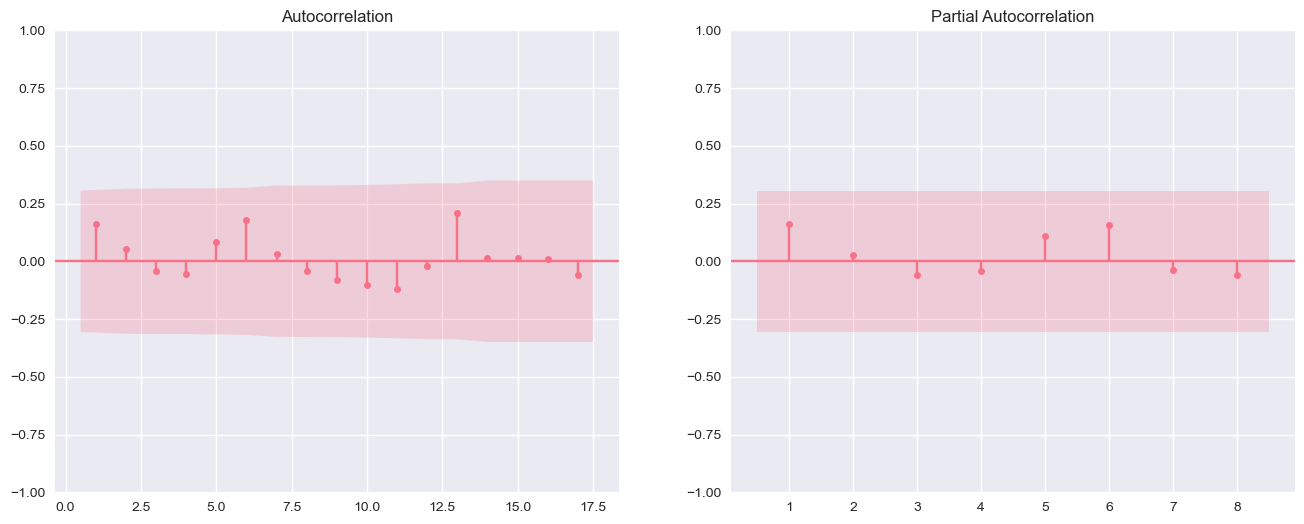

In [58]:
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(train_data, zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 8
tsaplots.plot_pacf(train_data, zero = False, ax = ax2, lags = 8)

plt.show()

In [59]:


import pmdarima as pm


auto_arima_model = pm.auto_arima(train_data, d = 3, seasonal = False, trace = True,
                                 error_action = 'ignore', suppress_warnings = True)

print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=401.010, Time=0.00 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=372.645, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=357.372, Time=0.01 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=352.996, Time=0.01 sec
 ARIMA(4,3,0)(0,0,0)[0]             : AIC=349.890, Time=0.02 sec
 ARIMA(5,3,0)(0,0,0)[0]             : AIC=348.804, Time=0.02 sec
 ARIMA(5,3,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(4,3,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(5,3,0)(0,0,0)[0] intercept   : AIC=350.712, Time=0.04 sec

Best model:  ARIMA(5,3,0)(0,0,0)[0]          
Total fit time: 0.368 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SA

In [60]:
final_model = ARIMA(kachin_time_series_indexed, order = (5, 3, 0))

final_model_results = final_model.fit()
# Review and adjust the predict time range to match the test set or desired forecast period
# For example, if your test set starts at '2023-01-01' and ends at '2025-01-01':
# Get the last date in the time series index
last_date = kachin_time_series_indexed.index[-1]

# If your index is quarterly, use pd.DateOffset(years=5) or pd.offsets.QuarterEnd(20)
# If your index is daily, use pd.DateOffset(years=5)
# Here, assuming the index is datetime (daily or monthly)
# Use the same frequency as your PeriodIndex (Q-DEC) to avoid IncompatibleFrequency
end_date = last_date + pd.offsets.QuarterEnd(20, startingMonth=12)

forecasted_ARIMA = final_model_results.predict(start=last_date, end=end_date)

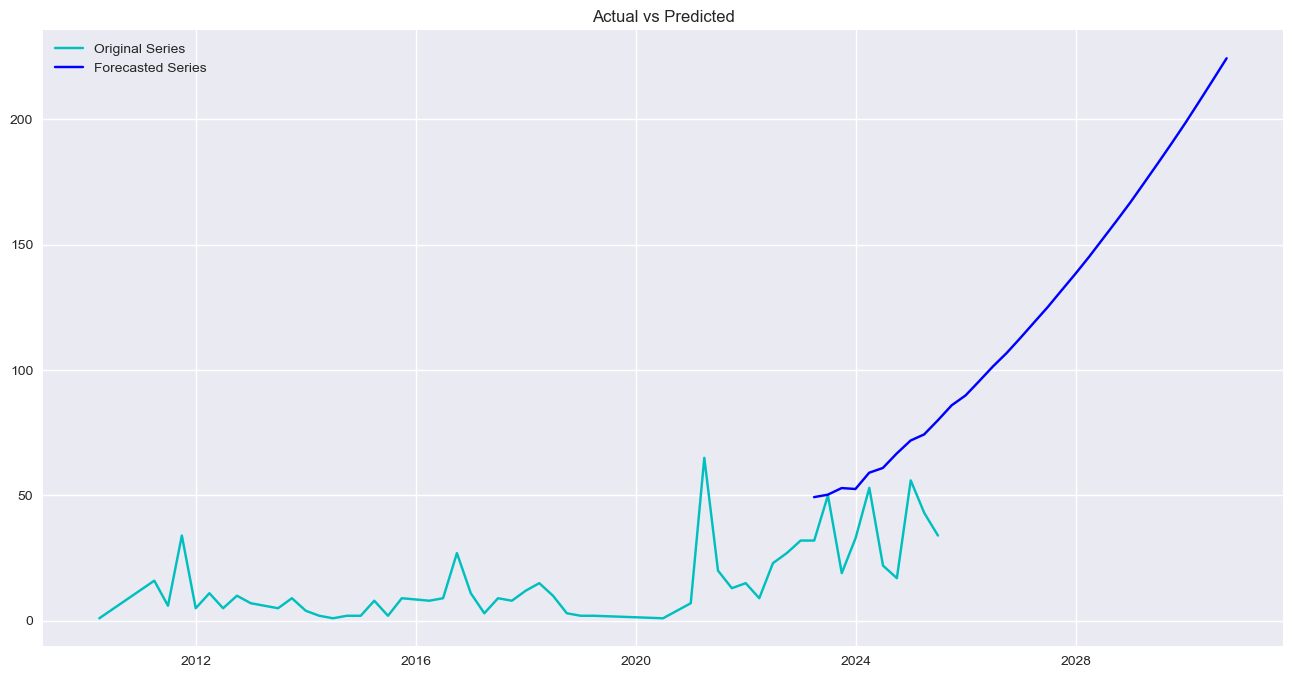

In [63]:
# Plotting the original time seris with forecast

plt.figure(figsize = (16, 8))

plt.plot(kachin_time_series_indexed.index.to_timestamp(), kachin_time_series_indexed.values, color='c', label='Original Series')

plt.plot(forecasted_ARIMA, label = 'Forecasted Series', color = 'b')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()